In [20]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [22]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [23]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df)

In [24]:
# Create a DataFrame with the scaled data
market_data_df_scaled_df = pd.DataFrame(market_data_df_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_df_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_df_scaled_df.set_index("coin_id", inplace=True)

# Display sample data
market_data_df_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [25]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(market_data_df_scaled_df)
    inertia.append(km.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of clusters', ylabel='Inertia'>

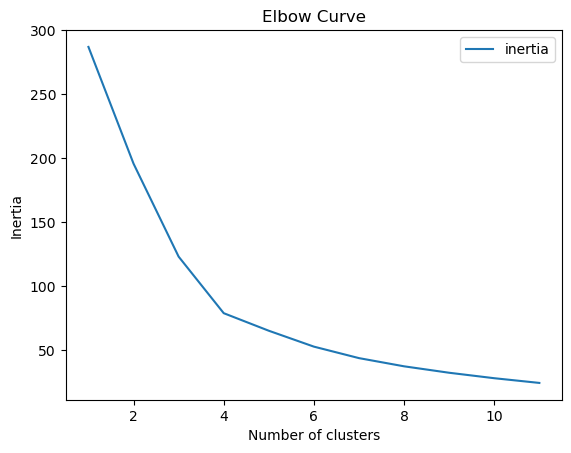

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot(x="k", y="inertia", title="Elbow Curve", xlabel="Number of clusters", ylabel="Inertia")

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for K could be 4 or 6 depending on how tight we want the cluster data.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [27]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [28]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df_scaled_df)

/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [29]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4_clusters = model.predict(market_data_df_scaled_df)

# View the resulting array of cluster values.
k_4_clusters

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [30]:
# Create a copy of the DataFrame
market_data_df_scaled_df_with_clusters = market_data_df_scaled_df.copy()

In [31]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_scaled_df_with_clusters["cluster"] = model.labels_

# Display sample data
market_data_df_scaled_df_with_clusters

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


<Axes: title={'center': 'Clusters using K-Means'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

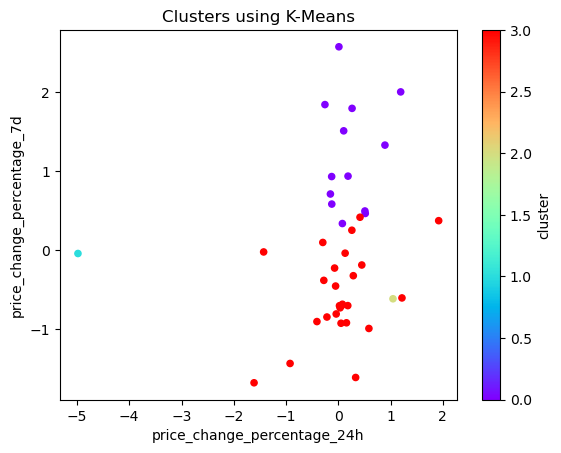

In [32]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_scaled_df_with_clusters.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="cluster", colormap="rainbow", title="Clusters using K-Means")

### Optimize Clusters with Principal Component Analysis.

In [33]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_df_scaled_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [47]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
market_data_pca_variance = pca.explained_variance_ratio_

market_data_pca_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 , 0.34700813, 0.17603793

In [50]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    data=market_data_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)

# Copy the crypto names from the original data
market_data_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_pca_df.set_index("coin_id", inplace=True)

# Display sample data
market_data_pca_df.head(10)

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [51]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_2 = list(range(1, 12))

# Create an empty list to store the inertia values
interia_2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_2:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(market_data_pca_df)
    interia_2.append(km.inertia_)

# Create a dictionary with the data to plot the Elbow curve
market_data_pca_df_elbow_data = {"k": k_2, "inertia": interia_2}

# Create a DataFrame with the data to plot the Elbow curve
market_data_pca_df_elbow = pd.DataFrame(market_data_pca_df_elbow_data)

# Display the DataFrame
market_data_pca_df_elbow

/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of clusters', ylabel='Inertia'>

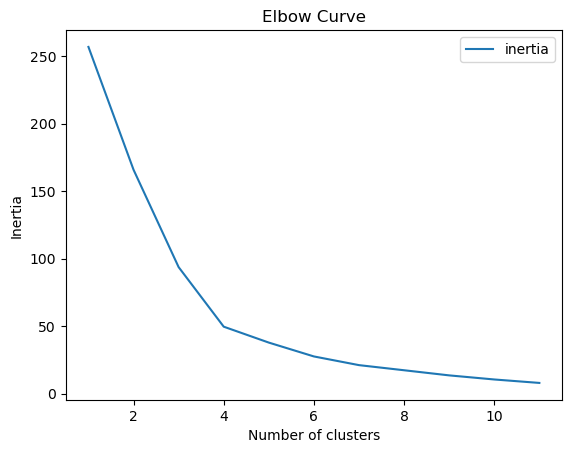

In [52]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
market_data_pca_df_elbow.plot(x="k", y="inertia", title="Elbow Curve", xlabel="Number of clusters", ylabel="Inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best value for K is likely 4 in this data set. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [53]:
# Initialize the K-Means model using the best value for k
model_2 = KMeans(n_clusters=4, random_state=0)

In [54]:
# Fit the K-Means model using the PCA data
model_2.fit(market_data_pca_df)

/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [55]:
# Predict the clusters to group the cryptocurrencies using the PCA data
model_2_clusters = model_2.predict(market_data_pca_df)

# Print the resulting array of cluster values.
model_2_clusters

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [56]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_df_clusters = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_df_clusters["cluster"] = model_2.labels_

# Display sample data
market_data_pca_df_clusters

,principal component 1,principal component 2,principal component 3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


<Axes: title={'center': 'Clusters using K-Means with PCA'}, xlabel='principal component 1', ylabel='principal component 2'>

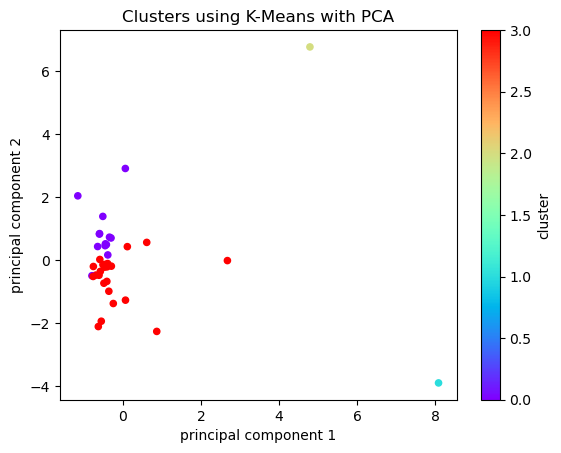

In [57]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_data_pca_df_clusters.plot.scatter(x="principal component 1", y="principal component 2", c="cluster", colormap="rainbow", title="Clusters using K-Means with PCA")

### Determine the Weights of Each Feature on each Principal Component

In [61]:
# Use the columns from the original scaled DataFrame as the index in new dataframe.

market_data_pca_weights = pd.DataFrame(pca.components_, columns=market_data_df_scaled_df.columns)

market_data_pca_weights




,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
1,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
2,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Component 1: Largest positive influence is the price change percent 200d and the largest negative influence is price change percent 24h.
Component 2: Largest positive influence is the price change percent 30d and the largest negative influence is price change percent 1y.
Component 3: Largest positive influence is the price change percent 7d and the largest negative influence is price change percent 60d.
    